In [1]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

# Évitez les camemberts à tout prix 

Dans l'exemple ci-dessous, on peut voir qu'il est beaucoup plus facile de comparer des données 

[171 221 212 243 159 203 185 163 168 204]


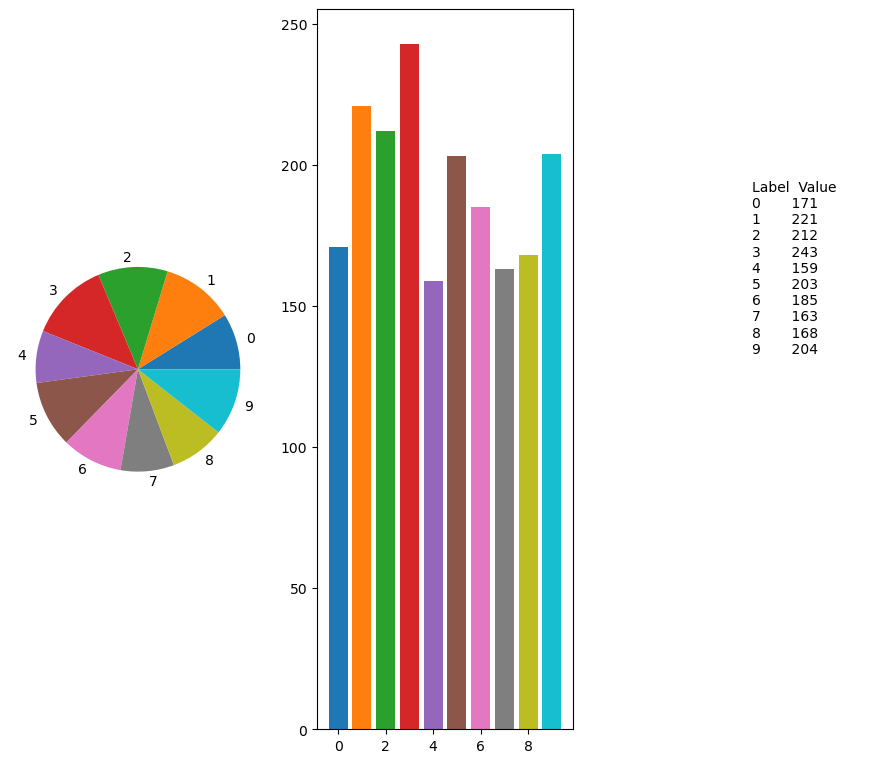

In [2]:
rng = np.random.default_rng()
random_nums = rng.integers(150, 250, 10)
cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
# Affichage pour contrôler que l'image n'est pas une image dans le cache
print(random_nums)

# création de la figure
fig = plt.figure(figsize=(10, 8))
# ajout d'une grille
gs = fig.add_gridspec(
    1, 3, left=0.08, right=0.95, bottom=0.05, top=0.95, wspace=0.2, hspace=0.35
)
# création des sous-figures : camembert puis barres
ax1 = fig.add_subplot(gs[0, 0])
ax1.pie(random_nums, labels=range(10))


ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(range(10), random_nums, label=range(10), color=cycle)

ax3 = fig.add_subplot(gs[0, 2])
ax3.axis("off")
lines = "Label  Value\n"
for i, num in enumerate(random_nums):
    lines += "{}       {}\n".format(i, num)
ax3.text(0.5, 0.5, lines)

plt.show()

Entre le tableau, le camembert et les barres, le plus simple pour voir le maximum n'est clairement pas le camembert!

# Comparaison de courbes

S'il faut déterminer où est l'endroit où la différence entre les deux courbes est la plus élevée, cela est très difficile à estimer sur le graphique de gauche alors que c'est trivial sur le graphique de droite.

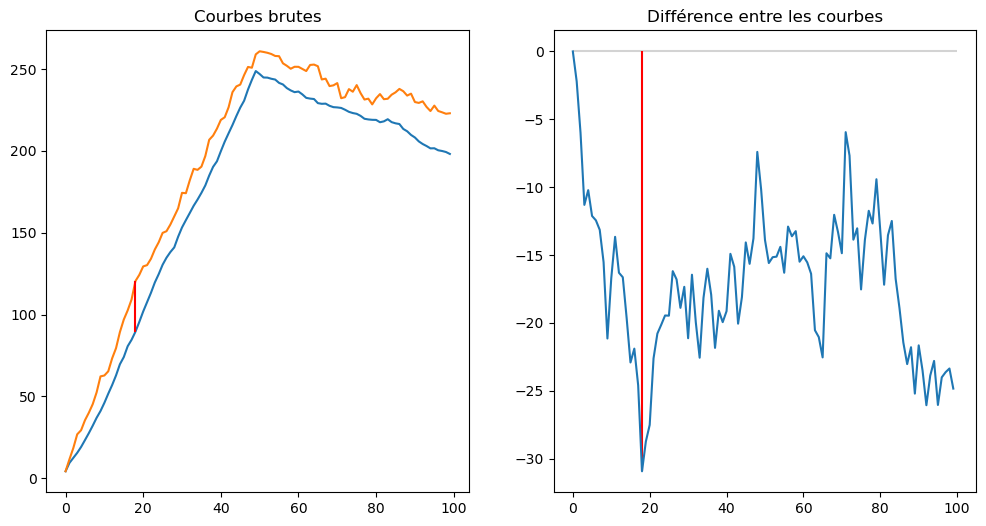

In [3]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np


# génération de nombres aléatoires
rng = np.random.default_rng(47)  # initialisation du seed
sampling = 50  # nombres de valeurs à tirer
# On tire des valeurs selon une distribution gaussienne
values = rng.normal(loc=5, scale=1, size=sampling)
values2 = rng.normal(loc=-1, scale=1, size=sampling)
# Puis on les concatène pour former la courbe "bleue"
serie1 = np.concatenate((values, values2))
# idem pour faire la courbe orange
values3 = rng.normal(loc=5, scale=3, size=sampling)
values4 = rng.normal(loc=-1, scale=3, size=sampling)
xs = np.arange(2 * sampling)
serie2 = np.concatenate((values3, values4))
# On fait la somme cumulative des nombres aléatoires
serie1 = np.cumsum(serie1)
serie2 = np.cumsum(serie2)
# calcul de la différence entre les deux courbes
diffs = serie1 - serie2

# indice du maximum entre les deux courbes
index = np.argmax(np.absolute(diffs))


fig = plt.figure(figsize=(12, 6))
# ajout d'une grille avec une ligne et deux colonnes
gs = fig.add_gridspec(1, 2)
# graphique de gauche
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(xs, serie1)
ax1.plot(xs, serie2)
# ajout en rouge de l'endroit avec l'écart le plus grand
ax1.vlines(index, serie1[index], serie2[index], color="red")
ax1.set_title("Courbes brutes")

# graphique de droite
ax2 = fig.add_subplot(gs[0, 1])
ax2.hlines(0, 0, 2 * sampling, color="lightgray")
# ajout en rouge de l'endroit avec l'écart le plus grand
ax2.vlines(index, 0, diffs[index], color="red")
ax2.plot(xs, serie1 - serie2)
ax2.set_title("Différence entre les courbes")
plt.show()

On peut voir sur l'exemple ci-dessus que notre œil est totalement trompé par la pente moyenne. Ce qui fait que spontanément, nous pensons que l'écart extrême se trouve sur la deuxième partie de la courbe alors que ce n'est pas du tout le cas.

# Inclure le zéro ou non peut largement changer le message

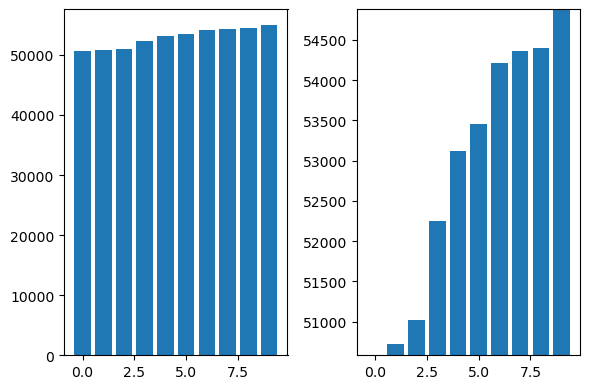

In [4]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

fig = plt.figure(figsize=(6, 4))
# ajout d'une grille
gs = fig.add_gridspec(1, 2)
# tirage de nombres aléatoires
rng = np.random.default_rng()
sampling = 10
values = rng.integers(50000, 55000, size=sampling)

# graphique de gauche
ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(range(sampling), np.sort(values))

# graphique de droite
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(range(sampling), np.sort(values))
# changement des limites
ax2.set_ylim(np.min(values), np.max(values))


plt.tight_layout()
plt.show()

Le graphique de gauche montre une certaine homogénéité des données malgré des variations de l'ordre de la dizaine de pourcent. Le graphique de droite présenté seul pourrait laisser croire au contraire qu'il y a des disparités énormes.

# Utilisation de meshgrid

La fonction meshgrid va permettre de calculer des fonctions sur une grille de point, qui peut être régulière ou non.

Pour commencer avec une grille régulière bidimensionnelle : on va stocker les points sous forme d'une matrice. à deux dimensions pour refléter le nombre et la dimension des points. De plus, on doit stocker deux coordonnées : les valeurs de x et celles en y pour chaque point.

La fonction meshgrid va donc  retourner une liste de coordonnées (valeurs en x,y,z,t,etc) qui aura la forme d'un tableau à N dimensions.

![meshgrid.png](meshgrid.png)

In [23]:
# On créé des points pour D dimensions (ici, 2 dimensions)
xs = np.linspace(-5, 5, 6)
ys = np.linspace(0, 10, 5)
grid = np.meshgrid(xs, ys, indexing="ij")
# xx et yy vont correspondre aux valeurs des x et des y
xx, yy = grid

In [24]:
# grid est une liste
print(type(grid))
# de longueur D
print(len(grid))
# et pour chaque coordonnée, on va la stocker également dans un tableau à D dimensions
print(grid[0].shape)

<class 'list'>
2
(6, 5)


In [25]:
# on va afficher la coordonnée du premier point en x et en y :
print("({};{})".format(grid[0][0, 0], grid[1][0, 0]))
print("({};{})".format(xx[0, 0], yy[0, 0]))

(-5.0;0.0)
(-5.0;0.0)


In [26]:
# Pour le dernier point
print("({};{})".format(xx[-1, -1], yy[-1, -1]))

(5.0;10.0)


In [27]:
# Pour un point intermédiaire
print("({};{})".format(xx[3, 4], yy[3, 4]))

(1.0;10.0)


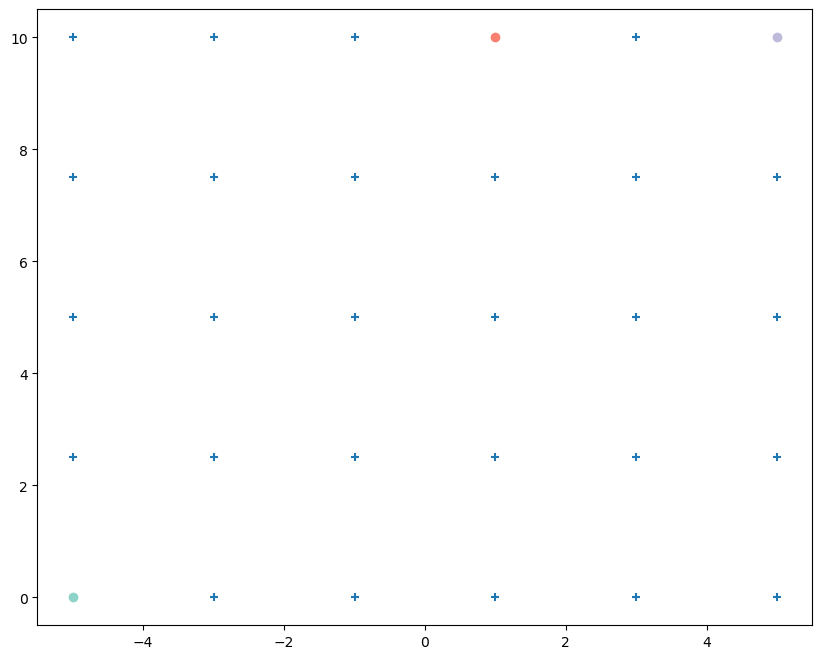

In [30]:
fig = plt.figure(figsize=(10, 8))

gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])

# on trace le nuage de points
ax.scatter(xx, yy, marker='+')


# on va ajouter le premier point en vert
ax.scatter(xx[0, 0], yy[0, 0], color="#8dd3c7")
# on va ajouter le dernier point en violet
ax.scatter(xx[-1, -1], yy[-1, -1], color="#bebada")
# Et le point intermédiaire en rouge
ax.scatter(xx[3, 4], yy[3, 4], color="#fb8072")
plt.show()